In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *

epochs = 20

In [3]:
accuracy_list = []

In [4]:
path_clas = Path('/home/ubuntu/data/autopsy/no_preprocessing')
path_lm = Path('/home/ubuntu/data/medical')

batch_size=32
drop_mult=0.3
learning_rate=1e-3
wd=1e-7
num_folds = 5

#folds only include training data
folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [5]:
data_lm = TextLMDataBunch.from_csv(path_lm,'documents-valid.csv', classes=['Suicide','Homicide'], bs=batch_size)

In [6]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple_no_preprocessing')

learn.freeze()

In [7]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


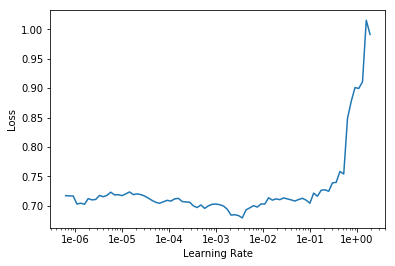

In [8]:
learn.recorder.plot()

In [9]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:19
epoch  train_loss  valid_loss  accuracy
1      0.680426    0.673323    0.592275  (00:04)
2      0.634235    0.609580    0.699571  (00:04)
3      0.615466    0.565658    0.716738  (00:04)
4      0.599442    0.581993    0.669528  (00:04)



In [10]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 03:08
epoch  train_loss  valid_loss  accuracy
1      0.565669    0.583511    0.708154  (00:10)
2      0.584801    0.542752    0.742489  (00:08)
3      0.588581    0.463127    0.798283  (00:08)
4      0.552539    0.516552    0.768240  (00:09)
5      0.541437    0.560091    0.742489  (00:09)
6      0.558876    0.496575    0.824034  (00:08)
7      0.504177    0.495137    0.738197  (00:10)
8      0.515059    0.453244    0.819743  (00:10)
9      0.513297    0.435436    0.785408  (00:08)
10     0.496882    0.498375    0.768240  (00:09)
11     0.487912    0.418318    0.781116  (00:09)
12     0.470327    0.464129    0.811159  (00:09)
13     0.463352    0.592762    0.742489  (00:09)
14     0.455747    0.399291    0.828326  (00:09)
15     0.437659    0.432610    0.798283  (00:09)
16     0.474851    0.407253    0.785408  (00:09)
17     0.434470    0.548147    0.759657  (00:09)
18     0.442503    0.471340    0.798283  (00:08)
19     0.422141    0.577438    0.746781  (00:10)
20     0.40

In [11]:
learn.validate()

[0.38425648, tensor(0.8412)]

In [12]:
accuracy_list.append(learn.validate()[1].item())

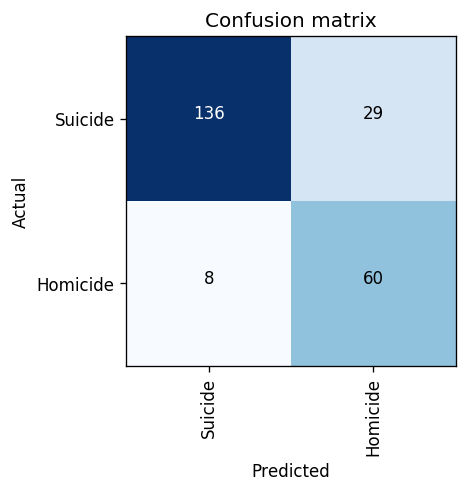

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

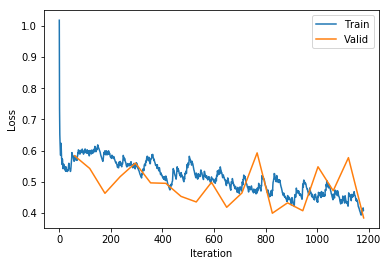

In [14]:
learn.recorder.plot_losses()

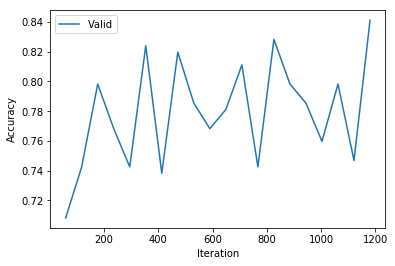

In [15]:
learn.recorder.plot_metrics()

In [16]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple_no_preprocessing')


learn.freeze()

In [17]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


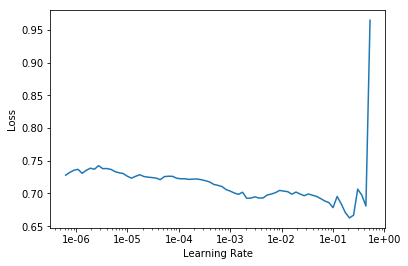

In [18]:
learn.recorder.plot()

In [19]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:19
epoch  train_loss  valid_loss  accuracy
1      0.662847    0.612319    0.686695  (00:04)
2      0.626638    0.605977    0.660944  (00:04)
3      0.563942    0.623623    0.682403  (00:05)
4      0.582793    0.552973    0.716738  (00:04)



In [20]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 02:53
epoch  train_loss  valid_loss  accuracy
1      0.588648    0.765905    0.467811  (00:09)
2      0.555361    0.534394    0.751073  (00:09)
3      0.550160    0.540561    0.755365  (00:10)
4      0.532040    0.405913    0.824034  (00:09)
5      0.525965    0.426506    0.763949  (00:09)
6      0.532316    0.399951    0.849785  (00:09)
7      0.547919    0.410827    0.785408  (00:09)
8      0.510225    0.443520    0.755365  (00:09)
9      0.503746    0.398194    0.836910  (00:10)
10     0.511987    0.483649    0.763949  (00:04)
11     0.528187    0.475403    0.751073  (00:03)
12     0.511945    0.520144    0.751073  (00:09)
13     0.492776    0.565015    0.763949  (00:08)
14     0.488148    0.534948    0.733906  (00:09)
15     0.492294    0.496625    0.746781  (00:08)
16     0.495703    0.357524    0.866953  (00:07)
17     0.473991    0.288995    0.871245  (00:08)
18     0.433358    0.406244    0.815451  (00:09)
19     0.457795    0.293473    0.879828  (00:07)
20     0.46

In [21]:
learn.validate()

[0.30661842, tensor(0.8670)]

In [22]:
accuracy_list.append(learn.validate()[1].item())

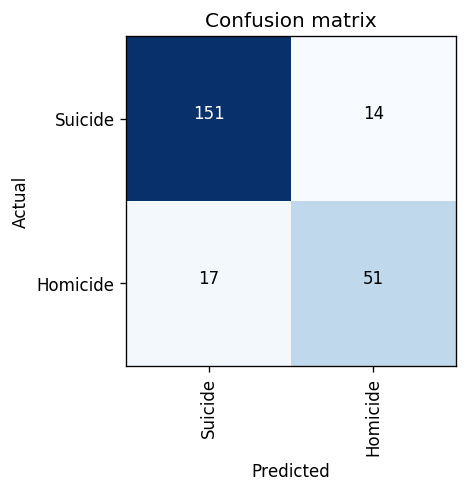

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

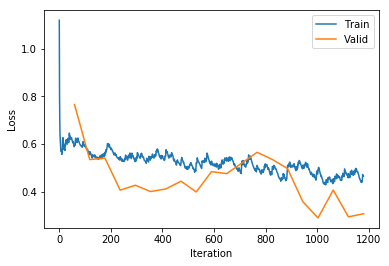

In [24]:
learn.recorder.plot_losses()

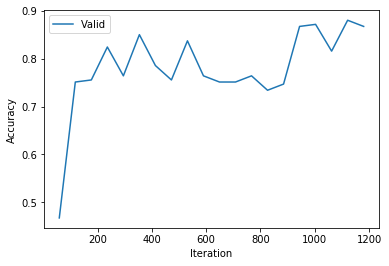

In [25]:
learn.recorder.plot_metrics()

In [26]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple_no_preprocessing')


learn.freeze()

In [27]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


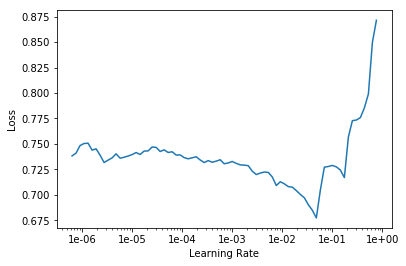

In [28]:
learn.recorder.plot()

In [29]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:18
epoch  train_loss  valid_loss  accuracy
1      0.696686    0.718025    0.476395  (00:04)
2      0.640121    0.637749    0.639485  (00:04)
3      0.607211    0.612764    0.716738  (00:04)
4      0.582997    0.662976    0.703863  (00:05)



In [30]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 03:05
epoch  train_loss  valid_loss  accuracy
1      0.595128    0.674503    0.622318  (00:08)
2      0.574246    0.539087    0.703863  (00:08)
3      0.564215    0.718503    0.570815  (00:09)
4      0.547996    0.500799    0.793991  (00:08)
5      0.534878    0.484912    0.828326  (00:09)
6      0.533149    0.456582    0.755365  (00:08)
7      0.545374    0.467548    0.763949  (00:09)
8      0.532609    0.415328    0.793991  (00:09)
9      0.506720    0.433106    0.751073  (00:10)
10     0.490690    0.379610    0.836910  (00:08)
11     0.505017    0.374566    0.828326  (00:08)
12     0.446259    0.543010    0.738197  (00:10)
13     0.426954    0.319759    0.849785  (00:10)
14     0.447444    0.326552    0.845494  (00:09)
15     0.466393    0.334882    0.866953  (00:09)
16     0.426981    0.408525    0.755365  (00:09)
17     0.434190    0.352913    0.845494  (00:08)
18     0.439003    0.392463    0.832618  (00:08)
19     0.409470    0.372376    0.836910  (00:09)
20     0.40

In [31]:
learn.validate()

[0.57335407, tensor(0.7339)]

In [32]:
accuracy_list.append(learn.validate()[1].item())

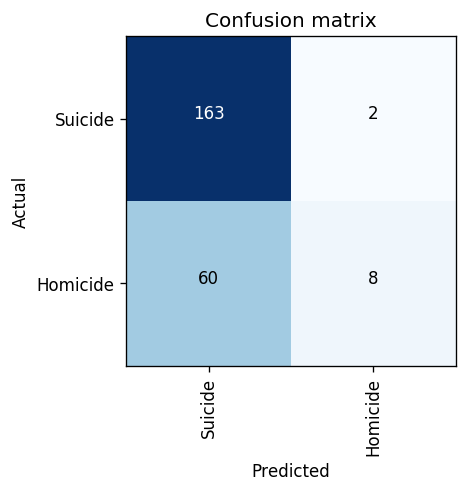

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

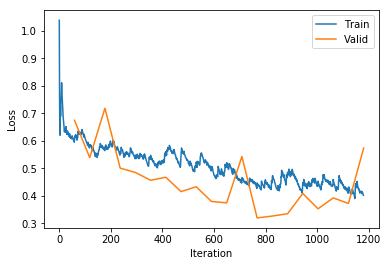

In [34]:
learn.recorder.plot_losses()

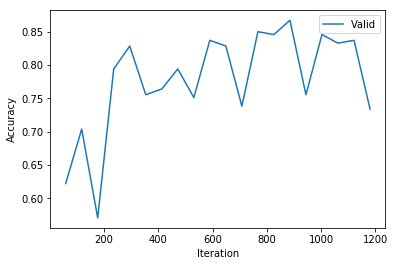

In [35]:
learn.recorder.plot_metrics()

In [36]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple_no_preprocessing')


learn.freeze()

In [37]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


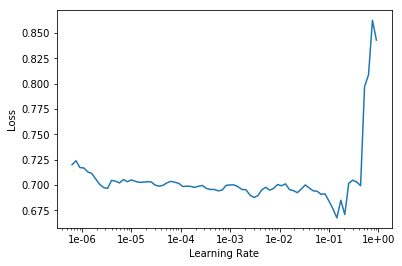

In [38]:
learn.recorder.plot()

In [39]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:21
epoch  train_loss  valid_loss  accuracy
1      0.625778    0.609197    0.712446  (00:05)
2      0.605273    0.617286    0.695279  (00:05)
3      0.580704    0.629572    0.682403  (00:05)
4      0.538868    0.583825    0.725322  (00:05)



In [40]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 03:06
epoch  train_loss  valid_loss  accuracy
1      0.577029    0.532491    0.716738  (00:09)
2      0.574396    0.462885    0.742489  (00:09)
3      0.566723    0.464023    0.776824  (00:08)
4      0.574416    0.428316    0.768240  (00:09)
5      0.542129    0.421259    0.772532  (00:09)
6      0.558194    0.425834    0.763949  (00:09)
7      0.550486    0.372402    0.832618  (00:08)
8      0.499857    0.381546    0.793991  (00:09)
9      0.488703    0.501226    0.755365  (00:09)
10     0.501487    0.435150    0.819743  (00:09)
11     0.533519    0.361167    0.815451  (00:08)
12     0.492681    0.345136    0.862661  (00:10)
13     0.471798    0.346292    0.836910  (00:10)
14     0.491138    0.368583    0.828326  (00:08)
15     0.480351    0.306102    0.875537  (00:10)
16     0.430652    0.290814    0.871245  (00:10)
17     0.452141    0.301879    0.884120  (00:08)
18     0.473686    0.285792    0.879828  (00:08)
19     0.462581    0.299669    0.884120  (00:08)
20     0.46

In [41]:
learn.validate()

[0.36125833, tensor(0.8240)]

In [42]:
accuracy_list.append(learn.validate()[1].item())

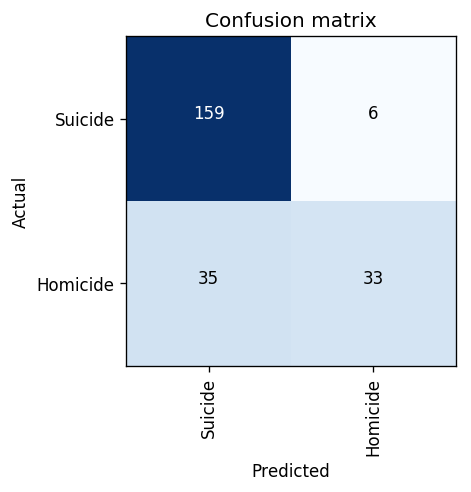

In [43]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

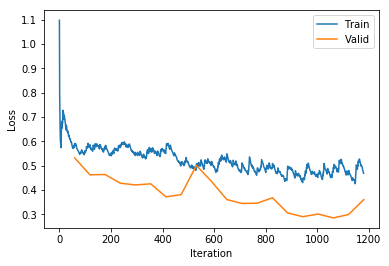

In [44]:
learn.recorder.plot_losses()

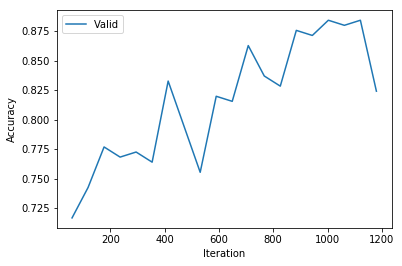

In [45]:
learn.recorder.plot_metrics()

In [46]:

data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple_no_preprocessing')


learn.freeze()

In [47]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


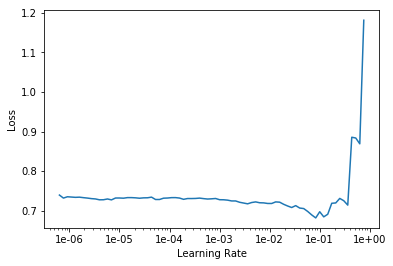

In [48]:
learn.recorder.plot()

In [49]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:20
epoch  train_loss  valid_loss  accuracy
1      0.644937    0.576231    0.776824  (00:05)
2      0.631275    0.626385    0.712446  (00:05)
3      0.599161    0.615359    0.665236  (00:04)
4      0.591061    0.545405    0.742489  (00:04)



In [50]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 03:03
epoch  train_loss  valid_loss  accuracy
1      0.611609    0.587294    0.725322  (00:08)
2      0.578031    0.693384    0.592275  (00:09)
3      0.582351    0.545486    0.699571  (00:08)
4      0.543243    0.470795    0.789700  (00:09)
5      0.554132    0.450664    0.755365  (00:09)
6      0.574644    0.421216    0.824034  (00:08)
7      0.552206    0.473535    0.742489  (00:09)
8      0.543847    0.431569    0.776824  (00:09)
9      0.530895    0.431353    0.789700  (00:08)
10     0.522574    0.393635    0.832618  (00:08)
11     0.483144    0.513334    0.768240  (00:10)
12     0.497742    0.419251    0.824034  (00:08)
13     0.514023    0.353541    0.845494  (00:10)
14     0.508290    0.424479    0.828326  (00:10)
15     0.485340    0.474404    0.798283  (00:09)
16     0.472019    0.327816    0.849785  (00:09)
17     0.502531    0.393067    0.862661  (00:08)
18     0.459938    0.400837    0.836910  (00:09)
19     0.463708    0.512515    0.793991  (00:08)
20     0.45

In [51]:
learn.validate()

[0.30840424, tensor(0.8884)]

In [52]:
accuracy_list.append(learn.validate()[1].item())

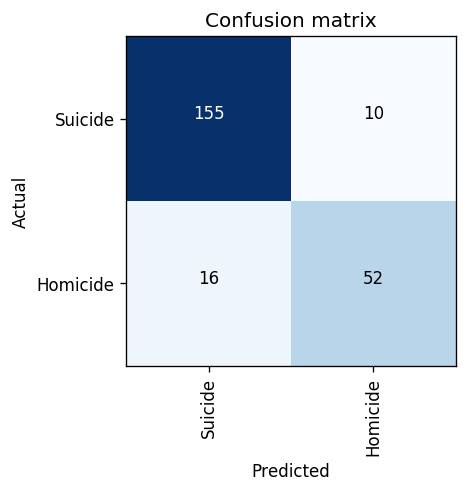

In [53]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

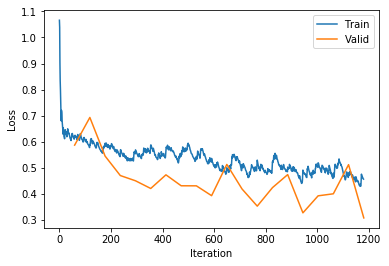

In [54]:
learn.recorder.plot_losses()

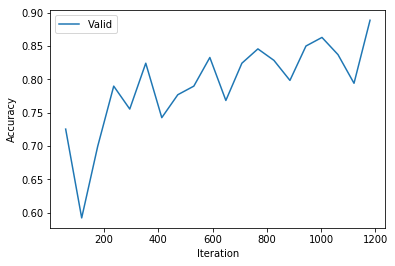

In [55]:
learn.recorder.plot_metrics()

In [56]:
print(accuracy_list)

[0.8412017226219177, 0.8669527769088745, 0.733905553817749, 0.8240343332290649, 0.8884119987487793]


In [57]:
print(sum(accuracy_list)/len(accuracy_list))

0.830901277065277


In [58]:

data_clas = TextClasDataBunch.from_csv(path_clas,'data_suicide_homicide_combined_train_test.csv', vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_nidia_not_pretrained_simple_no_preprocessing')


learn.freeze()

In [59]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:21
epoch  train_loss  valid_loss  accuracy
1      0.661674    0.588064    0.768340  (00:05)
2      0.616659    0.537128    0.768340  (00:05)
3      0.564517    0.514947    0.783784  (00:05)
4      0.540863    0.480107    0.791506  (00:05)



In [60]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 03:23
epoch  train_loss  valid_loss  accuracy
1      0.571107    0.444547    0.803089  (00:09)
2      0.593047    0.459893    0.710425  (00:09)
3      0.533742    0.346449    0.876448  (00:10)
4      0.477424    0.402930    0.814672  (00:10)
5      0.508633    0.369299    0.861004  (00:09)
6      0.523099    0.450088    0.822394  (00:09)
7      0.557500    0.380159    0.810811  (00:09)
8      0.475368    0.395723    0.799228  (00:11)
9      0.482784    0.410159    0.791506  (00:10)
10     0.502799    0.394057    0.884170  (00:09)
11     0.455184    0.371823    0.849421  (00:10)
12     0.472296    0.406210    0.845560  (00:09)
13     0.446198    0.312375    0.880309  (00:10)
14     0.451544    0.338291    0.864865  (00:09)
15     0.381064    0.331207    0.857143  (00:11)
16     0.418742    0.326885    0.861004  (00:10)
17     0.473329    0.356381    0.853282  (00:09)
18     0.389945    0.321132    0.884170  (00:11)
19     0.436367    0.340121    0.853282  (00:09)
20     0.40

In [61]:
learn.validate()

[0.35619733, tensor(0.8185)]

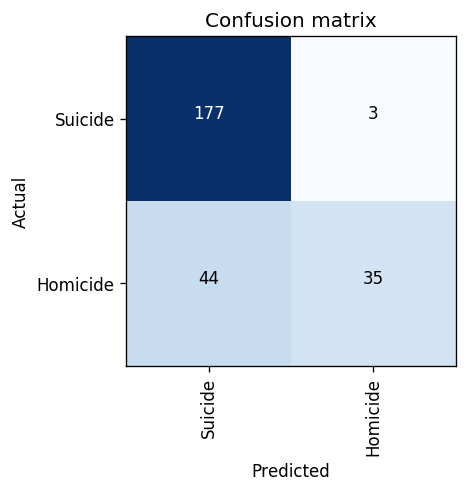

In [62]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

In [63]:
import torch

torch.cuda.empty_cache()